# Lecture 13: Multi-locus population genetics

## Lecture overview

1. [Multi-locus population genetics](#section1)
2. [Summary](#section2)

We now know how to find equilibria and determine their stability in nonlinear multivariate models. And we've seen continuous-time examples of disease spread and competition. Here, we'll look at a discrete-time example, extending the univariate discrete-time dipliod selection model to multiple loci. This is a relatively complex model that will give you a sense of what doing research in theoretical population genetics can be like.

<span id='section1'></span>
## 1. Multi-locus population genetics
<hr>

Genomes contain many loci -- what new dynamics arise when we model more than one locus? Here we look at the simplest multi-locus model, two loci each with two alleles. Let's denote the loci with letters, $A$ and $B$, and the alleles at each with numbers, $1$ and $2$. This gives a total of $2^2=4$ haploid genotypes, which we'll give frequencies $x_1$ to $x_4$ like so

| genotype | frequency |
| :------: | :-------: |
| $A_1B_1$ |   $x_1$   |
| $A_1B_2$ |   $x_2$   |
| $A_2B_1$ |   $x_3$   |
| $A_2B_2$ |   $x_4$   | 
    
with the constraint that the total frequency sums to one, $x_1+x_2+x_3+x_4 = 1$.

To determine how these frequencies change from one generation to the next, let's first determine the order of events in a life-cycle diagram

<center>
```mermaid
graph LR;
    A((census)) --> B((gamete union));
    B --> C((selection));
    C --> D((meiosis));    
    D --> A;
```   
</center>

In words, we'll census the population in the gamete (haploid) phase while selection happens in the diploid phase.

Next, to consider how the frequencies change through this life cyle, let's construct a life-cycle (mating) table. To do this, we need to consider what happens during meiosis when there are multiple loci. 

In the 1-locus models we analyzed earlier, meiosis meant Mendelian segregation: each allele is present in 1/2 of the gametes. Here, with 2 loci, things are slightly more complicated and we need to consider **recombination**. Every meiosis there is a chance, $r$, of an odd number of crossover events between the two loci ($r$ will increase with the distance between the loci). When this happens the pairing of the alleles at loci A and B get swapped. This only has an effect in diploid individuals that are heterozygous at both loci ("double heterozygotes"), here $A_1B_1$ x $A_2B_2$ and $A_1B_2$ x $A_2B_1$. Every time these individuals go through meiosis the original pairings are kept with probability $1-r$ and the alternative pairings are created with probability $r$. 

We can now fill in the following table

| union | frequency | frequency after selection | gamete frequency after meiosis ($A_1B_1$, $A_1B_2$, $A_2B_1$, $A_2B_2$) |
| :---: | :-------: | :-----------------------: | :----------------------------: |
| $A_1B_1$ x $A_1B_1$ | $x_1^2$ | $x_1^2 w_{11}/\bar{w}$ | 1, 0, 0, 0 | 
| $A_1B_1$ x $A_1B_2$ | $2x_1x_2$ | $2x_1x_2 w_{12}/\bar{w}$ | 1/2, 1/2, 0, 0 | 
| $A_1B_1$ x $A_2B_1$ | $2x_1x_3$ | $2x_1x_3 w_{13}/\bar{w}$ | 1/2, 0, 1/2, 0 | 
| $A_1B_1$ x $A_2B_2$ | $2x_1x_4$ | $2x_1x_4 w_{14}/\bar{w}$ | $(1-r)/2$, $r/2$, $r/2$, $(1-r)/2$ | 
| $A_1B_2$ x $A_1B_2$ | $x_2^2$ | $x_2^2 w_{22}/\bar{w}$ | 0, 1, 0, 0 | 
| $A_1B_2$ x $A_2B_1$ | $2x_2x_3$ | $2x_2x_3 w_{23}/\bar{w}$ | $r/2$, $(1-r)/2$, $(1-r)/2$, $r/2$ | 
| $A_1B_2$ x $A_2B_2$ | $2x_2x_4$ | $2x_2x_4 w_{24}/\bar{w}$ | 0, 1/2, 0, 1/2 | 
| $A_2B_1$ x $A_2B_1$ | $x_3^2$ | $x_3^2 w_{33}/\bar{w}$ | 0, 0, 1, 0 | 
| $A_2B_1$ x $A_2B_2$ | $2x_3x_4$ | $2x_3x_4 w_{34}/\bar{w}$ | 0, 0, 1/2, 1/2 | 
| $A_2B_2$ x $A_2B_2$ | $x_4^2$ | $x_4^2 w_{44}/\bar{w}$ | 0, 0, 0, 1 |

where $w_{ij}=w_{ji}$ is the fitness of the diploid that is composed of haploid genotypes $i$ and $j$ and $\bar{w}$ is the population mean fitness, which is the sum of the frequencies after selection.

We can build the recursion equations from this table by multiplying the frequency after selection by the gamete frequency after meiosis. For example, the frequency of $A_1B_1$ in the next generation is found by multiplying the first entry in the final column by the frequency after selection and summing this up over rows, giving

$$\begin{align}
x_1(t+1) 
&= x_1(t)^2 w_{11}/\bar{w} + x_1(t)x_2(t) w_{12}/\bar{w} + x_1(t)x_3(t) w_{13}/\bar{w} + (1-r)x_1(t)x_4(t) w_{14}/\bar{w} + r x_2(t)x_3(t) w_{23}/\bar{w}\\
&= x_1(t) (x_1(t) w_{11}/\bar{w} + x_2(t) w_{12}/\bar{w} + x_3(t) w_{13}/\bar{w} + x_4(t) w_{14}/\bar{w}) - r(x_1(t)x_4(t) w_{14}/\bar{w} - x_2(t)x_3(t) w_{23}/\bar{w})\\
&= x_1(t) \sum_{i=1}^{4} x_i(t) w_{1i}/\bar{w} - r D^*,
\end{align}$$

where $D^*=x_1(t)x_4(t) w_{14}/\bar{w} - x_2(t)x_3(t) w_{23}/\bar{w}$ is called **linkage disequilibrium** (the asterisk differentiates it from the same quantity measured prior to selection, $D=x_1(t)x_4(t) - x_2(t)x_3(t)$). Linkage disequilibrium is an important term in population genetics that measures the deviation of the association of alleles at two loci from that expected by chance under random assortment. For example, when $A_1$ pairs with $B_1$ more often than expected by chance then $x_1(t)x_4(t) > x_2(t)x_3(t)$ and $D>0$. 

The remaining equations are created in the same way, giving

$$\begin{align}
x_2(t+1) &= x_2(t) \sum_{i=1}^{4} x_i(t) w_{2i}/\bar{w} + r D^* \\
x_3(t+1) &= x_3(t) \sum_{i=1}^{4} x_i(t) w_{3i}/\bar{w} + r D^* \\
x_4(t+1) &= x_4(t) \sum_{i=1}^{4} x_i(t) w_{4i}/\bar{w} - r D^*.
\end{align}$$

Now we have a system of recursion equations to work with. This system is nonlinear and four dimensional, which makes things relatively complex. For instance, it is impossible to find all the equilibria analytically. Here we'll not worry about that and just deal with a particularly simple equilibrium where $A_1B_1$ is fixed, $\hat{x}_1=1$ and $\hat{x}_2=\hat{x}_3=\hat{x}_4=0$. This implies $\bar{w}=w_{11}$.

To determine the stability of this equilbrium we need to calculate the Jacobian

$$
\mathbf{J} = 
\begin{pmatrix}
\frac{\partial x_1(t+1)}{\partial x_1(t)} & \frac{\partial x_1(t+1)}{\partial x_2(t)} & \frac{\partial x_1(t+1)}{\partial x_3(t)} & \frac{\partial x_1(t+1)}{\partial x_4(t)}\\
\frac{\partial x_2(t+1)}{\partial x_1(t)} & \frac{\partial x_2(t+1)}{\partial x_2(t)} & \frac{\partial x_2(t+1)}{\partial x_3(t)} & \frac{\partial x_2(t+1)}{\partial x_4(t)}\\
\frac{\partial x_3(t+1)}{\partial x_1(t)} & \frac{\partial x_3(t+1)}{\partial x_2(t)} & \frac{\partial x_3(t+1)}{\partial x_3(t)} & \frac{\partial x_3(t+1)}{\partial x_4(t)}\\
\frac{\partial x_4(t+1)}{\partial x_1(t)} & \frac{\partial x_4(t+1)}{\partial x_2(t)} & \frac{\partial x_4(t+1)}{\partial x_3(t)} & \frac{\partial x_4(t+1)}{\partial x_4(t)}\\
\end{pmatrix}
$$

(we omit writing out the derivatives for brevity) and then evaluate it at the focal equilibrium, $\mathbf{J}_{x_1=1,x_2=x_3=x_4=0}$. Local stability of the focal equilibrium is determined by the eigenvalues of this matrix, which are

$$\begin{aligned}
\lambda_1 &= 0 \\
\lambda_2 &= w_{12}/w_{11} \\
\lambda_3 &= w_{13}/w_{11} \\
\lambda_4 &= (1-r)w_{14}/w_{11}. 
\end{aligned}$$

The first eigenvalue, $\lambda_1 = 0$, indicates that there is an axis along which or system does not change. This is due to the fact that the frequencies always sum to one, $x_1+x_2+x_3+x_4=1$. We therefore effectively have a three dimensional model, e.g., we could just track $x_1$, $x_2$, and $x_3$ because we know that $x_4 = 1 - x_1-x_2-x_3$.

The second and third eigenvalues, $\lambda_2 = w_{12}/w_{11}$ and $\lambda_3 = w_{13}/w_{11}$, are analogous to what we found in the 1 locus (univariate) case. Remembering that stability in discrete time requires that the eigenvalues are less than 1 in absolute value, we can interpret these eigenvalues as saying that the $B_2$ allele can invade when it has higher fitness than the $B_1$ allele ($w_{12}>w_{11}$) and the $A_2$ can invade when it has higher fitness than the $A_1$ allele ($w_{13}>w_{11}$). If either allele can invade our equilibrium is unstable. 

The fourth eigenvalue, $\lambda_4 = (1-r)w_{14}/w_{11}$, is the new part, which depends on recombination. Interestingly, here, even if $A_2B_2$ has higher fitness than $A_1B_1$, meaning $w_{14}>w_{11}$, it is possible that the $A_2B_2$ genotype cannot invade. This is because, for a rare $A_2B_2$ genotype, every generation it pairs with the common $A_1B_1$ genotype and therefore gets broken apart into $A_1B_2$ and $A_2B_1$ by recombination with probability $r$. In other words, recombination can hinder the spread of an adaptive combination of alleles. This is epitiomized by the scenario where having a single "2" allele is deleterious $w_{12}<w_{11}$ and $w_{13}<w_{11}$ (making $\lambda_2<1$ and $\lambda_3<1$) but having two "2" alleles is beneficial, $w_{14}>w_{11}$. Such a scenario is called a **fitness valley** because of the shape of the plot below.

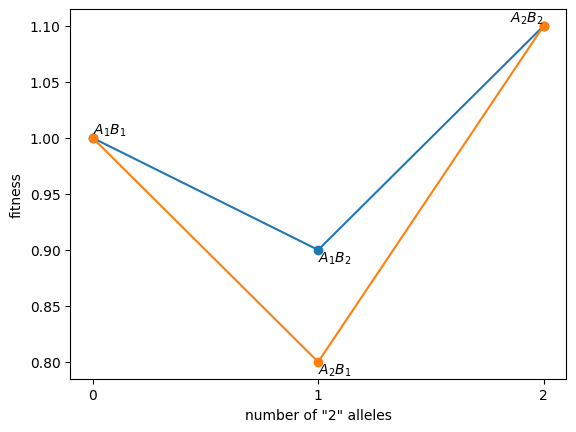

In [14]:
import matplotlib.pyplot as plt

w11=1
w12=0.9
w13=0.8
w14=1.1

fig,ax=plt.subplots()

ax.plot([0,1,2],[w11,w12,w14],marker='o')
ax.plot([0,1,2],[w11,w13,w14],marker='o')
ax.text(0,w11,r'$A_1B_1$',va='bottom')
ax.text(1,w12,r'$A_1B_2$',va='top')
ax.text(1,w13,r'$A_2B_1$',va='top')
ax.text(2,w14,r'$A_2B_2$',va='bottom',ha='right')

ax.set_ylabel('fitness')
ax.set_xlabel('number of "2" alleles')
ax.set_xticks([0,1,2])
plt.show()

Here we've seen how recombination can slow the spread of the optimal genotype, $A_2B_2$, potentially preventing fitness-valley crossing. There is also, however, a constructive aspect of recombination, not explored in this simple model: when the deleterious genotypes $A_1B_2$ and $A_2B_1$ are both present, there is a chance that they pair and recombine, giving rise to the optimal genotype $A_2B_2$. The role of recombination in fitness-valley crossing is therefore a relatively interesting and complex problem (see, for example, [Weissman et al. 2010, Genetics](https://academic.oup.com/genetics/article/186/4/1389/6063653)).

<span id='section2'></span>
## 2. Summary
<hr>

We've used what we know about equilibria and stability in non-linear multivariate models to investigate the effect of natural selection on evolution when there are mulitple loci. This is a relatively complex discrete-time example.

Although we cannot solve for all equilibria, we can find one ($A_1B_1$ fixed) and we evaluated its stability. This equilibrium is stable if neither $A_2$ or $B_2$ can invade on their own (as in the one locus case) and $A_2$ and $B_2$ cannot invade together. This last invasion depends on both the fitness of $A_2B_2$ as well as the rate it is broken up by recombination between the loci.

See section 8.3 of the textbook for more information.